<a href="https://colab.research.google.com/github/starkjones/Food-Sales-Predictions-/blob/main/Food_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales-Prediction
### Week 1: Python for Data Science
Jonthan Jones 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [ ]:
sales_data = '/content/drive/MyDrive/Colab Notebooks/Week 1/sales_predictions.csv'
df = pd.read_csv(sales_data)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
# 1. How many rows and columns?

df.shape 

# (8523 rows, 12 columns)

(8523, 12)

In [ ]:
# 2.  What are the datatypes of each variable?

df.info()
 # Index  Column Name                Non-Null Count  Dtype                     
 # 0      Item_Identifier            8523 non-null   object 
 # 1      Item_Weight                7060 non-null   float64
 # 2      Item_Fat_Content           8523 non-null   object 
 # 3      Item_Visibility            8523 non-null   float64
 # 4      Item_Type                  8523 non-null   object 
 # 5      Item_MRP                   8523 non-null   float64
 # 6      Outlet_Identifier          8523 non-null   object 
 # 7      Outlet_Establishment_Year  8523 non-null   int64  
 # 8      Outlet_Size                6113 non-null   object 
 # 9      Outlet_Location_Type       8523 non-null   object 
 # 10     Outlet_Type                8523 non-null   object 
 # 11     Item_Outlet_Sales          8523 non-null   float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# 3. Are there duplicates? If so, drop any duplicates.

# df.duplicated()
df.duplicated().sum()

# No duplicates present

0

In [ ]:
# 4. Identify missing values.

df.isna().sum()
# Item Weight is missing 1463 values and Outlet Size is missing 2410

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# 5. Decide on how to address the missing values and do it! 
# (This requires your judgement, so explain your choice).

# Item Weight (float64): 1463/8523 = 17% of values missing
# Outlet Size (object): 2410/8523 = 28% of values missing 

# Neither column is close to missing 50% of data,  
# the industry-accepted threshhold for removal justifcation 

# Therefore the missing values in Item weight will be replaced with 
# the column's mean since its data type is a float

IW_mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(IW_mean, inplace=True)
df['Item_Weight'].value_counts()

# Missing Outlet Size data will be replaced with the most common entry:

df['Outlet_Size'].fillna("Medium", inplace=True)
df['Outlet_Size'].value_counts()


Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
 # 6. Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# 7. Find and fix any inconsistent categories of data (example: fix cat, Cat, 
# and cats so that they are consistent) 
# Answer: Checking all columns with object datatypes:

# df['Item_Fat_Content'].value_counts() displays, what I assume are 3 
# diffferent versions of "Low Fat", and two different versions of "Regular" 
# as seen below:

# Low Fat    5089
# Regular    2889
# LF          316
# reg         117
# low fat     112
# Name: Item_Fat_Content, dtype: int64

df['Item_Fat_Content'].replace({"LF":"Low Fat", "low fat": "Low Fat", "reg": "Regular"}, inplace= True)
df["Item_Fat_Content"].value_counts()

# df['Item_Type'].value_counts() # No inconsistencies 

# df['Outlet_Identifier'].value_counts() # No inconsistencies

# df['Outlet_Size'].value_counts() # No inconsistencies

# df['Outlet_Location_Type'].value_counts() # No inconsistencies

# df['Outlet_Type'].value_counts() # No inconsistencies


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# 8. For any numerical columns, obtain the summary statistics of each (min, max, mean)

# Summary stats for all numeric columns

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


TypeError: ignored

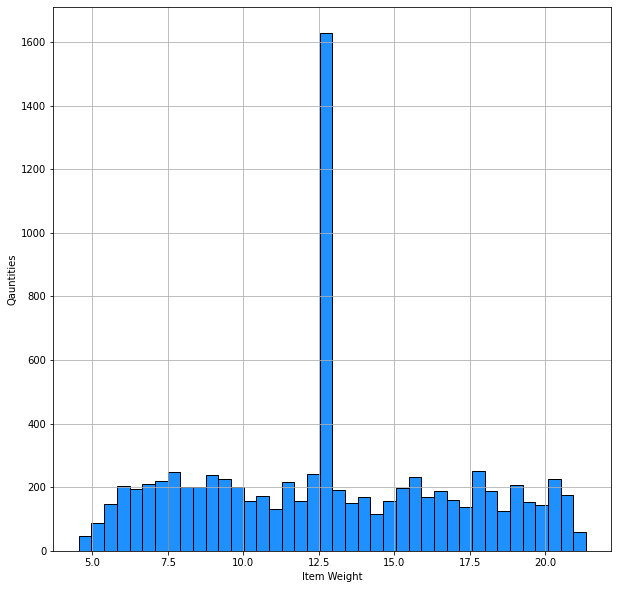

In [ ]:
# Histogram to view the distributions of various features in your dataset. 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df['Item_Weight'].hist(bins=40, color=["dodgerblue"], edgecolor="black", figsize=[10,10], );

plt.xlabel("Item Weight");
plt.ylabel("Qauntities");

plt.title("Item Weight Distribution", fontsize = 24);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

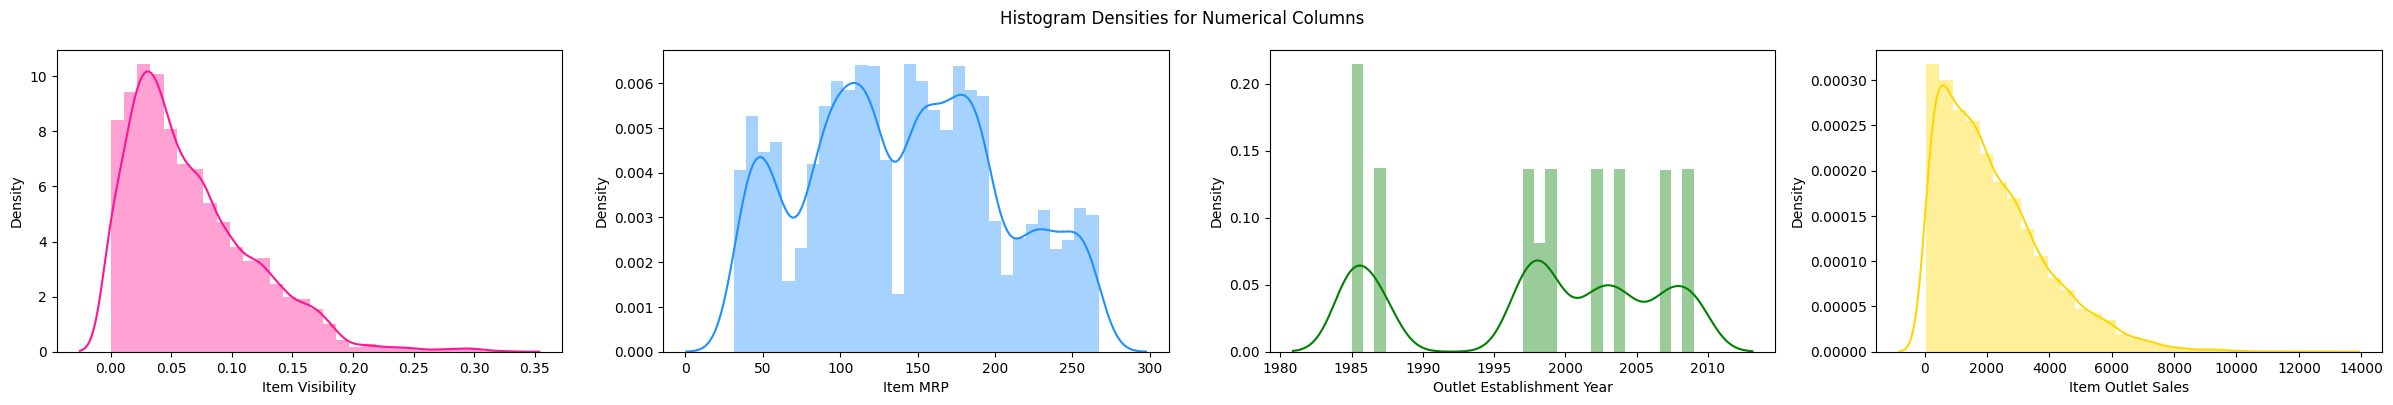

In [ ]:

IV = df['Item_Visibility']         
IMRP = df['Item_MRP']                   
OEY = df['Outlet_Establishment_Year']  
IOS = df['Item_Outlet_Sales']         

fig, axes = plt.subplots(1, 4,figsize=(30,4), sharey=False, dpi=100);
plt.suptitle('Histogram Densities for Numerical Columns')
sns.distplot(IV, bins=30, hist=True, color="deeppink", ax=axes[0], axlabel='Item Visibility');
sns.distplot(IMRP, bins=30, hist=True, color="dodgerblue", ax=axes[1], axlabel='Item MRP');
sns.distplot(OEY, bins=30, hist=True, color="green", ax=axes[2], axlabel='Outlet Establishment Year');
sns.histplot(IOS, bins=30, hist=True, color="gold", ax=axes[3], axlabel='Item Outlet Sales');

# adapted from https://practicaldatascience.co.uk/data-science/how-to-visualise-data-using-histograms-in-pandas

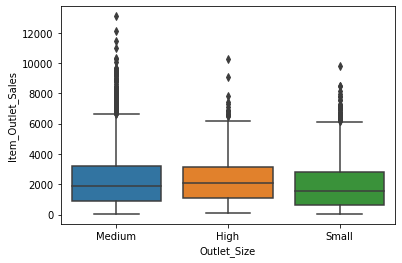

In [ ]:
# Boxplot to view statistical summaries of various features in your dataset.

sns.boxplot(data= df, x='Outlet_Size', y='Item_Outlet_Sales');

In [ ]:
# Heatmap of the correlation between features.
correlation = df.corr()
correlation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


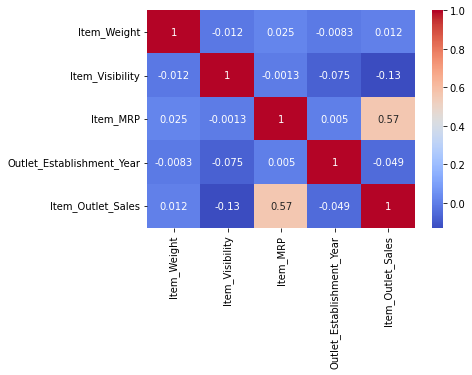

In [ ]:
sns.heatmap(correlation, cmap = 'coolwarm', annot=True);